In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
### ETF-USO ###
uso = pd.read_csv('etf_USO.csv')

uso = uso.rename(columns={'Date': 'ds', 'Close/Last': 'y'})
uso['y'] = uso['y'].replace('[\$,]', '', regex=True).astype(float)
uso = uso.sort_values('ds')

print(uso)

              ds      y   Volume   Open    High     Low
316   01/02/2024  65.77  7908570  67.56  67.560  65.480
64    01/02/2025  76.93  3271771  76.84  77.560  76.840
817   01/03/2022  54.83  5602883  53.97  55.160  53.940
566   01/03/2023  67.64  3339735  68.64  69.650  67.120
315   01/03/2024  68.19  7136842  66.92  68.360  66.720
...          ...    ...      ...    ...     ...     ...
567   12/30/2022  70.11  3648523  68.36  70.270  68.350
66    12/30/2024  74.82  1621041  74.86  75.270  74.455
1070  12/31/2020  33.01  4424897  32.73  33.105  32.630
818   12/31/2021  54.36  2497852  54.89  55.170  54.040
65    12/31/2024  75.55  1273741  75.24  75.750  74.975

[1257 rows x 6 columns]


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(uso)

future = model.make_future_dataframe(periods=39)
forecast = model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl4_sp5e9/ck9ek94b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl4_sp5e9/esbkhkpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24628', 'data', 'file=/tmp/tmpl4_sp5e9/ck9ek94b.json', 'init=/tmp/tmpl4_sp5e9/esbkhkpa.json', 'output', 'file=/tmp/tmpl4_sp5e9/prophet_model0g9m8ku3/prophet_model-20250409204044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:40:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


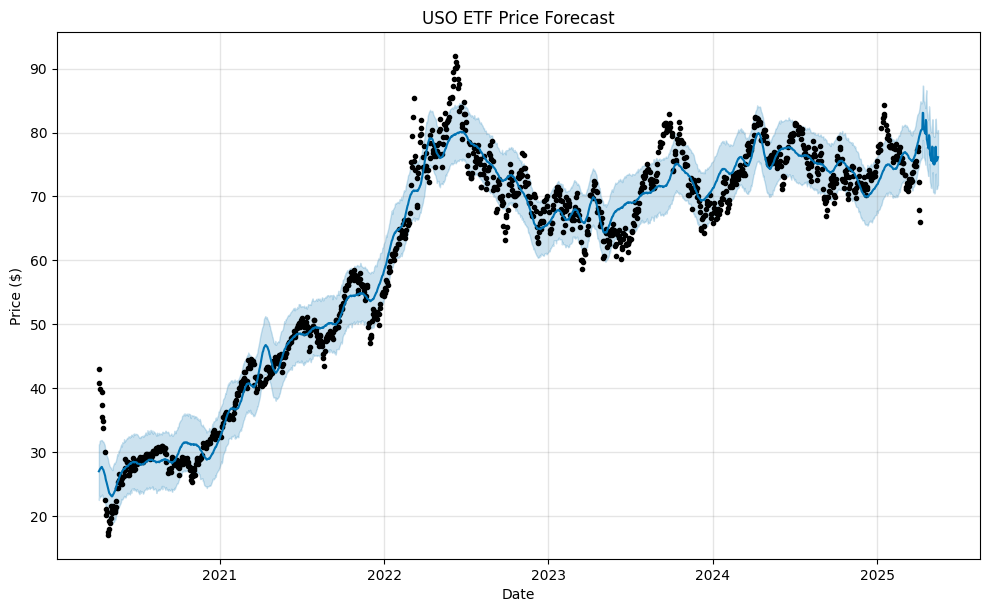

In [ ]:
fig1 = model.plot(forecast)
plt.title("USO ETF Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
today = pd.to_datetime("today").normalize()
future_predictions = forecast[forecast['ds'] >= today]
print(future_predictions[['ds', 'yhat']].to_string(index=False))

        ds      yhat
2025-04-08 80.250280
2025-04-09 80.304407
2025-04-10 80.404276
2025-04-11 80.547483
2025-04-12 82.964013
2025-04-13 82.930891
2025-04-14 80.452684
2025-04-15 80.343402
2025-04-16 80.079480
2025-04-17 79.864615
2025-04-18 79.702433
2025-04-19 81.828715
2025-04-20 81.525921
2025-04-21 78.803571
2025-04-22 78.480041
2025-04-23 78.035456
2025-04-24 77.676447
2025-04-25 77.408770
2025-04-26 79.469497
2025-04-27 79.141520
2025-04-28 76.433948
2025-04-29 76.163921
2025-04-30 75.809554
2025-05-01 75.574756
2025-05-02 75.461930
2025-05-03 77.704252
2025-05-04 77.580286
2025-05-05 75.094484
2025-05-06 75.059124
2025-05-07 74.947366


In [ ]:
# Build one model with evaluation

train = uso.iloc[:-30]
test = uso.iloc[-30:]

model_eva = Prophet(daily_seasonality=True)
model_eva.fit(train)

22:42:08 - cmdstanpy - INFO - Chain [1] start processing
22:42:08 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model_eva.make_future_dataframe(periods=len(test))
forecast = model_eva.predict(future)
test['ds'] = pd.to_datetime(test['ds'])
forecast_on_test = model_eva.predict(test[['ds']])

merged = pd.merge(test[['ds', 'y']], forecast_on_test[['ds', 'yhat']], on='ds', how='inner')

y_true = merged['y'].values
y_pred = merged['yhat'].values

mae = np.mean(np.abs(y_true - y_pred))
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 2.94
RMSE: 3.15
MAPE: 5.14%


/var/folders/j3/nx6r2jg90fd3hr99mj70jx980000gn/T/ipykernel_1958/427370397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


In [ ]:
### ETF-OILK ###
oilk = pd.read_csv('etf_OILK.csv')

oilk = oilk.rename(columns={'Date': 'ds', 'Close/Last': 'y'})
oilk['y'] = oilk['y'].replace('[\$,]', '', regex=True).astype(float)
oilk = oilk.sort_values('ds')

In [ ]:
model_oilk = Prophet(daily_seasonality=True)
model_oilk.fit(oilk)

oilk_future = model_oilk.make_future_dataframe(periods=39)
oilk_forecast = model_oilk.predict(oilk_future)

00:08:43 - cmdstanpy - INFO - Chain [1] start processing
00:08:43 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
today = pd.to_datetime("today").normalize()
future_predictions = oilk_forecast[oilk_forecast['ds'] >= today]
print(future_predictions[['ds', 'yhat']].to_string(index=False))

        ds      yhat
2025-04-09 46.804481
2025-04-10 46.884966
2025-04-11 47.042971
2025-04-12 49.495939
2025-04-13 49.516994
2025-04-14 47.099320
2025-04-15 47.046269
2025-04-16 46.943276
2025-04-17 46.800007
2025-04-18 46.734649
2025-04-19 48.969188
2025-04-20 48.781167
2025-04-21 46.167967
2025-04-22 45.936820
2025-04-23 45.676633
2025-04-24 45.400061
2025-04-25 45.227739
2025-04-26 47.383500
2025-04-27 47.146111
2025-04-28 44.513523
2025-04-29 44.292891
2025-04-30 44.072406
2025-05-01 43.863403
2025-05-02 43.784627
2025-05-03 46.057514
2025-05-04 45.957995
2025-05-05 43.480818
2025-05-06 43.429655
2025-05-07 43.389026
2025-05-08 43.366491
2025-05-09 43.477016
2025-05-10 45.938341
2025-05-11 46.022860
2025-05-12 43.722036
2025-05-13 43.836568
2025-05-14 43.948372
2025-05-15 44.062829
2025-05-16 44.293178
2025-05-17 46.855909


In [ ]:
### ETF-BNO:oil fund

bno = pd.read_csv('/content/etf_BNO.csv')
bno = bno.rename(columns = {'Date':'ds','Close/Last':'y'})

m_bno = Prophet(daily_seasonality = True)
m_bno.fit(bno)
bno_future = m_bno.make_future_dataframe(periods = 39)
bno_fore = m_bno.predict(bno_future)

today = pd.to_datetime("today").normalize()
future_pre = bno_fore[bno_fore['ds'] >= today]
print(future_pre[['ds','yhat']].to_string(index = False))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl4_sp5e9/od19l51_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl4_sp5e9/l6idgrom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89166', 'data', 'file=/tmp/tmpl4_sp5e9/od19l51_.json', 'init=/tmp/tmpl4_sp5e9/l6idgrom.json', 'output', 'file=/tmp/tmpl4_sp5e9/prophet_modelx_9ulzol/prophet_model-20250409204137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        ds      yhat
2025-04-09 31.334003
2025-04-10 31.363247
2025-04-11 31.422200
2025-04-12 31.678725
2025-04-13 31.663403
2025-04-14 31.379419
2025-04-15 31.305734
2025-04-16 31.228557
2025-04-17 31.189460
2025-04-18 31.182343
2025-04-19 31.376417
2025-04-20 31.303525
2025-04-21 30.967987
2025-04-22 30.849754
2025-04-23 30.735858
2025-04-24 30.668511
2025-04-25 30.642057
2025-04-26 30.825952
2025-04-27 30.752080
2025-04-28 30.424601
2025-04-29 30.323123
2025-04-30 30.234152
2025-05-01 30.199218
2025-05-02 30.211846
2025-05-03 30.440556
2025-05-04 30.416207
2025-05-05 30.141878
2025-05-06 30.096058
2025-05-07 30.064133
2025-05-08 30.086534
2025-05-09 30.155734
2025-05-10 30.439276
2025-05-11 30.467133
2025-05-12 30.241606
2025-05-13 30.240533
2025-05-14 30.248780
2025-05-15 30.306396
2025-05-16 30.405620
2025-05-17 30.713890


In [ ]:
### ETF- S&P

spx = pd.read_csv('/content/etf_SPX.csv')

spx = spx.rename(columns={'Date': 'ds', 'Close/Last': 'y'})
spx['y'] = spx['y'].replace('[\$,]', '', regex=True).astype(float)
spx = spx.sort_values('ds')

In [ ]:
model_spx = Prophet(daily_seasonality=True)
model_spx.fit(spx)

spx_future = model_spx.make_future_dataframe(periods=39)
spx_forecast = model_spx.predict(spx_future)

today = pd.to_datetime("today").normalize()
future_predictions = spx_forecast[spx_forecast['ds'] >= today]
print(future_predictions[['ds', 'yhat']].to_string(index=False))

00:09:17 - cmdstanpy - INFO - Chain [1] start processing
00:09:18 - cmdstanpy - INFO - Chain [1] done processing


        ds        yhat
2025-04-09 5858.291963
2025-04-10 5856.918220
2025-04-11 5858.431411
2025-04-12 5823.278426
2025-04-13 5824.201225
2025-04-14 5861.802318
2025-04-15 5860.177724
2025-04-16 5864.564796
2025-04-17 5863.396362
2025-04-18 5864.988979
2025-04-19 5829.756277
2025-04-20 5830.413974
2025-04-21 5867.546482
2025-04-22 5865.240711
2025-04-23 5868.734443
2025-04-24 5866.470708
2025-04-25 5866.785954
2025-04-26 5830.122974
2025-04-27 5829.235205
2025-04-28 5864.752317
2025-04-29 5860.812747
2025-04-30 5862.710571
2025-05-01 5858.948205
2025-05-02 5857.922759
2025-05-03 5820.137084
2025-05-04 5818.402146
2025-05-05 5853.400750
2025-05-06 5849.318282
2025-05-07 5851.487939
2025-05-08 5848.441987
2025-05-09 5848.596902
2025-05-10 5812.463485
2025-05-11 5812.848625
2025-05-12 5850.418719
2025-05-13 5849.330470
2025-05-14 5854.876515
2025-05-15 5855.537413
2025-05-16 5859.667852
2025-05-17 5827.708121


需要考虑会不会因为价格差别太大干扰weight

In [ ]:
### ETF-XLE:energy select sector ###
xle_path = ''
xle = pd.read_csv('/content/etf_XLE.csv')

xle = xle.rename(columns={'Date':'ds', 'Close/Last':'y'})
xle['y'] = xle['y'].replace('[\$,]', '', regex=True).astype(float)
xle.head()

,ds,y,Volume,Open,High,Low
0,04/08/2025,76.44,45269240,80.66,81.075,75.22
1,04/07/2025,78.25,56953360,76.21,81.580,74.98
2,04/04/2025,78.76,50375960,83.65,84.590,78.76
3,04/03/2025,86.74,37828920,89.65,90.340,86.71
4,04/02/2025,94.13,16980300,93.20,94.210,92.98


In [ ]:
model_xle = Prophet(daily_seasonality=True)
model_xle.fit(xle)

xle_future = model_xle.make_future_dataframe(periods=39)
xle_forecast = model_xle.predict(xle_future)

today = pd.to_datetime("today").normalize()
future_predictions = xle_forecast[xle_forecast['ds'] >= today]
print(future_predictions[['ds', 'yhat']].to_string(index=False))

10:58:27 - cmdstanpy - INFO - Chain [1] start processing
10:58:28 - cmdstanpy - INFO - Chain [1] done processing


        ds      yhat
2025-04-09 94.059010
2025-04-10 94.002517
2025-04-11 94.082457
2025-04-12 94.025368
2025-04-13 94.029044
2025-04-14 94.104127
2025-04-15 94.080241
2025-04-16 94.085160
2025-04-17 93.978613
2025-04-18 94.009398
2025-04-19 93.904730
2025-04-20 93.863073
2025-04-21 93.895721
2025-04-22 93.832923
2025-04-23 93.803050
2025-04-24 93.666382
2025-04-25 93.672225
2025-04-26 93.548248
2025-04-27 93.493313
2025-04-28 93.519044
2025-04-29 93.455955
2025-04-30 93.432607
2025-05-01 93.309397
2025-05-02 93.335665
2025-05-03 93.239034
2025-05-04 93.218234
2025-05-05 93.284672
2025-05-06 93.268557
2025-05-07 93.298057
2025-05-08 93.233088
2025-05-09 93.322424
2025-05-10 93.293036
2025-05-11 93.342920
2025-05-12 93.482673
2025-05-13 93.541618
2025-05-14 93.646975
2025-05-15 93.657649
2025-05-16 93.821357
2025-05-17 93.863969


In [ ]:
### ETF-QCLN:clean eneergy

file_path = '/Users/chenshuo/Downloads/QCLN.csv'
qcln = pd.read_csv(file_path)

qcln = qcln.rename(columns = {'Date':'ds','Close/Last':'y'})
qcln['y'] = qcln['y'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
model_qcln = Prophet(daily_seasonality=True)
model_qcln.fit(qcln)

qc_future = model_qcln.make_future_dataframe(periods=39)
qc_forecast = model_qcln.predict(qc_future)

today = pd.to_datetime("today").normalize()
future_predictions = qc_forecast[qc_forecast['ds'] >= today]
print(future_predictions[['ds', 'yhat']].to_string(index=False))

12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing


        ds      yhat
2025-04-09 29.393273
2025-04-10 29.195715
2025-04-11 29.056792
2025-04-12 29.087265
2025-04-13 28.986029
2025-04-14 28.910770
2025-04-15 28.784185
2025-04-16 28.680776
2025-04-17 28.460893
2025-04-18 28.297201
2025-04-19 28.299896
2025-04-20 28.167536
2025-04-21 28.057724
2025-04-22 27.893350
2025-04-23 27.749386
2025-04-24 27.486927
2025-04-25 27.279647
2025-04-26 27.238987
2025-04-27 27.064961
2025-04-28 26.916788
2025-04-29 26.719093
2025-04-30 26.548648
2025-05-01 26.268351
2025-05-02 26.053626
2025-05-03 26.017549
2025-05-04 25.861592
2025-05-05 25.746204
2025-05-06 25.596959
2025-05-07 25.491251
2025-05-08 25.292238
2025-05-09 25.175218
2025-05-10 25.252734
2025-05-11 25.225315
2025-05-12 25.252067
2025-05-13 25.256831
2025-05-14 25.314913
2025-05-15 25.287067
2025-05-16 25.345915
2025-05-17 25.601118


In [ ]:
etf_name = 'USO'
etf_price = pd.read_csv('etf_USO.csv')
etf_df = etf_price.copy()
etf_df['Date'] = pd.to_datetime(etf_df['Date'])
etf_name = 'USO'
etf_price = pd.read_csv('etf_USO.csv')
etf_df = etf_price.copy()
etf_df['Date'] = pd.to_datetime(etf_df['Date'])
etf_df = etf_df.sort_values('Date')
etf_df['Close/Last'] = etf_df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
etf_df = etf_df[['Date', 'Close/Last']].rename(columns={'Close/Last': f'{etf_name}'})
etf_df.set_index('Date', inplace=True)


weekly = etf_df.resample('W-MON').ffill()

weekly.head()


,USO
Date,
2020-04-13,39.44
2020-04-20,30.00
2020-04-27,17.52
2020-05-04,19.67
2020-05-11,21.17


In [ ]:
gas_price = pd.read_csv('/content/Gasoline Prices 2010-2025.3.3.csv')

gas_price.columns = ['Date', 'Gas_Price']
gas_price['Date'] = pd.to_datetime(gas_price['Date'])
gas_price['Gas_Price'] = pd.to_numeric(gas_price['Gas_Price'], errors='coerce')
gas_price = gas_price.dropna()
gas_price.set_index('Date', inplace=True)

gas_price.head()

,Gas_Price
Date,
2010-01-04,2.718
2010-01-11,2.804
2010-01-18,2.793
2010-01-25,2.760
2010-02-01,2.717


In [24]:
## func to fine the corr

def gas_etf_correlation(gas_price: pd.DataFrame, etf_price: pd.DataFrame, etf_name: str) -> float:
  etf_df = etf_price.copy()
  etf_df['Date'] = pd.to_datetime(etf_df['Date'])
  etf_df = etf_df.sort_values('Date')
  etf_df['Close/Last'] = etf_df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
  etf_df = etf_df[['Date', 'Close/Last']].rename(columns={'Close/Last': f'{etf_name}_Price'})
  etf_df.set_index('Date', inplace=True)

  weekly = etf_df.resample('W-MON').ffill()

  combined = gas_price.join(weekly, how='inner')
  returns = combined.pct_change().dropna()

  correlation = returns['Gas_Price'].corr(returns[f'{etf_name}_Price'])
  correlation_matrix = returns.corr()

  return correlation, correlation_matrix

In [34]:
uso_price = pd.read_csv('etf_USO.csv')
gas_etf_correlation(gas_price, uso_price, 'USO')

(np.float64(0.3262047650847174),
            Gas_Price  USO_Price
 Gas_Price   1.000000   0.326205
 USO_Price   0.326205   1.000000)

In [35]:
oilk_price = pd.read_csv('etf_OILK.csv')
gas_etf_correlation(gas_price, oilk_price, 'OILK')

(np.float64(0.332468629708601),
             Gas_Price  OILK_Price
 Gas_Price    1.000000    0.332469
 OILK_Price   0.332469    1.000000)

In [30]:
bno_price = pd.read_csv('etf_BNO.csv')
gas_etf_correlation(gas_price, bno_price, 'BNO')

(np.float64(0.3373215711068502),
            Gas_Price  BNO_Price
 Gas_Price   1.000000   0.337322
 BNO_Price   0.337322   1.000000)

In [31]:
spx_price = pd.read_csv('etf_SPX.csv')
gas_etf_correlation(gas_price, spx_price, 'SPX')

(np.float64(-0.1287933667222031),
            Gas_Price  SPX_Price
 Gas_Price   1.000000  -0.128793
 SPX_Price  -0.128793   1.000000)

In [32]:
qcln_price = pd.read_csv('etf_QCLN.csv')
gas_etf_correlation(gas_price, qcln_price, 'QCLN')

(np.float64(-0.05189093627747855),
             Gas_Price  QCLN_Price
 Gas_Price    1.000000   -0.051891
 QCLN_Price  -0.051891    1.000000)

In [33]:
xle_price = pd.read_csv('etf_XLE.csv')
gas_etf_correlation(gas_price, xle_price, 'XLE')

(np.float64(0.18746643055973947),
            Gas_Price  XLE_Price
 Gas_Price   1.000000   0.187466
 XLE_Price   0.187466   1.000000)